In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For this exercise here I wanted to work with the data sets from Seaborn

In [ ]:
sns.get_dataset_names() #these are the names of the data sets in Seabor

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
#I wanted to see which data set was the bigger; so I applied the following for-cicle
for sets in sns.get_dataset_names():
  print(sets,sns.load_dataset(sets).shape)

anagrams (20, 5)
anscombe (44, 3)
attention (60, 5)
brain_networks (923, 63)
car_crashes (51, 8)
diamonds (53940, 10)
dots (848, 5)
dowjones (649, 2)
exercise (90, 6)
flights (144, 3)
fmri (1064, 5)
geyser (272, 3)
glue (64, 5)
healthexp (274, 4)
iris (150, 5)
mpg (398, 9)
penguins (344, 7)
planets (1035, 6)
seaice (13175, 2)
taxis (6433, 14)
tips (244, 7)
titanic (891, 15)


In [ ]:
df = sns.load_dataset('taxis') #I decided to work with the 'Taxis' dataset

In [ ]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
print('the set has',df.shape[0],'rows')
print('and',df.shape[1],'columns')


the set has 6433 rows
and 14 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
print('the following columns have missing values: ')

df.isna().sum()[df.isna().sum()>0]

the following columns have missing values: 


payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [ ]:
#No duplicated values in our data set
df.duplicated().sum()

0

In [ ]:
print('We have 44 missing values for payments, which represents',round(df.isna().sum()['payment']/6433*100,2), 'of our dataset')


We have 44 missing values for payments, which represents 0.68 of our dataset


In [ ]:
#I'll just drop those rows because they represent a small part of the set
df = df.dropna(subset=['payment']).reset_index(drop=True)

In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

# Time for some descrptive statistics

In [ ]:
round(df.describe(),2)

,passengers,distance,fare,tip,tolls,total
count,6389.00,6389.00,6389.00,6389.00,6389.00,6389.00
mean,1.54,3.03,13.10,1.99,0.33,18.54
std,1.21,3.83,11.54,2.45,1.42,13.81
min,0.00,0.00,1.00,0.00,0.00,1.30
25%,1.00,0.99,6.50,0.00,0.00,10.80
50%,1.00,1.65,9.50,1.73,0.00,14.16
75%,2.00,3.21,15.00,2.82,0.00,20.30
max,6.00,36.70,150.00,33.20,24.02,174.82


# Here I'm checking why I have 0 values in passengers and fare

In [ ]:
#there are 90 rows with 0 passengers... interesting'
df[df['passengers']==0].head()
#these maybe a taxi used for delivery. I'm speculating


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
13,2019-03-27 12:13:34,2019-03-27 12:25:48,0,2.9,11.5,0.00,0.00,14.80,yellow,cash,Financial District North,Two Bridges/Seward Park,Manhattan,Manhattan
40,2019-03-24 18:42:56,2019-03-24 19:09:00,0,4.5,20.0,0.00,0.00,23.30,yellow,cash,TriBeCa/Civic Center,Kips Bay,Manhattan,Manhattan
91,2019-03-28 07:05:19,2019-03-28 07:41:14,0,10.6,33.5,0.00,5.76,40.06,yellow,credit card,East Tremont,Midtown East,Bronx,Manhattan
116,2019-03-23 09:39:25,2019-03-23 09:56:45,0,3.6,15.5,3.75,0.00,22.55,yellow,credit card,Yorkville East,Penn Station/Madison Sq West,Manhattan,Manhattan
177,2019-03-16 17:27:17,2019-03-16 17:41:03,0,3.5,14.5,0.00,0.00,15.30,yellow,cash,Manhattan Valley,Washington Heights South,Manhattan,Manhattan


In [ ]:
df[df['distance']==0].head()
#these maybe cancelled rides

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
41,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
119,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.0,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
617,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
665,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.0,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
962,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.0,50.30,yellow,credit card,NaN,NaN,NaN,NaN


# Let's check the distributions

<Axes: xlabel='total', ylabel='Count'>

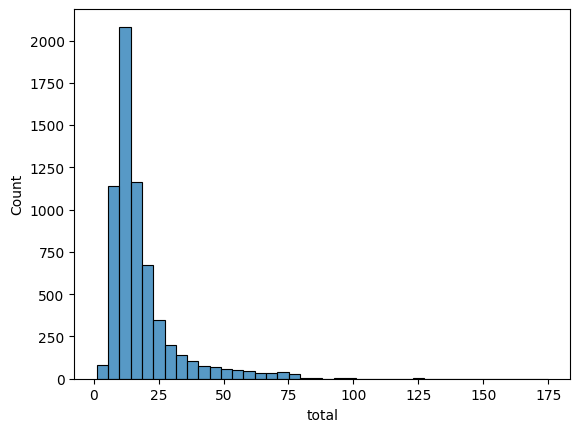

In [ ]:
sns.histplot(df,x='total',bins=40) # this is a histogram about the distribution for the total price of the rides

# Is there a correlation between distance and total or passengers and total?

In [ ]:
corr = round(df.corr(),2)
corr

<ipython-input-106-73c79454b22f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = round(df.corr(),2)


,passengers,distance,fare,tip,tolls,total
passengers,1.00,0.01,0.01,0.02,-0.00,0.02
distance,0.01,1.00,0.92,0.45,0.63,0.91
fare,0.01,0.92,1.00,0.49,0.61,0.97
tip,0.02,0.45,0.49,1.00,0.42,0.65
tolls,-0.00,0.63,0.61,0.42,1.00,0.68
total,0.02,0.91,0.97,0.65,0.68,1.00


<Axes: >

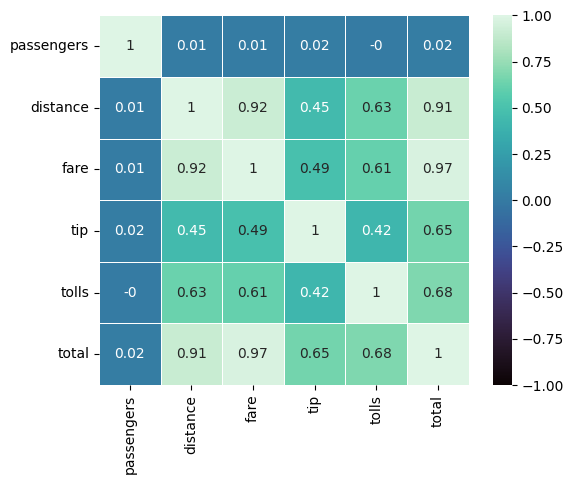

In [ ]:
sns.heatmap(corr,square=True, cmap='mako', vmin=-1, vmax=1, linewidth=0.5,annot=True)

## Heat map for hours or days that taxis where take more

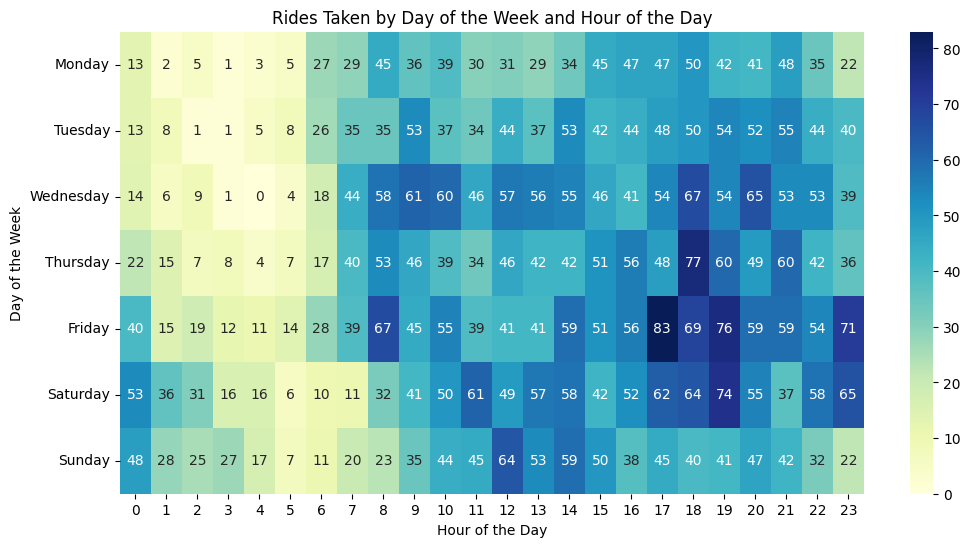

In [ ]:
# Extract the day of the week from the 'pickup' datetime column
df['pickup_day_of_week'] = df['pickup'].dt.day_name()
df['pickup_hour'] = df['pickup'].dt.hour

# Create a pivot table to represent the data as a heatmap
heatmap_data = df.pivot_table(index='pickup_day_of_week', columns='pickup_hour', aggfunc='size', fill_value=0)

# Define the order of days of the week for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.loc[day_order], cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Rides Taken by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.show()



In [ ]:
df.pickup_month.value_counts()

March       6388
February       1
Name: pickup_month, dtype: int64